In [23]:
import cartopy.crs as ccrs

In [95]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import nc_time_axis
import cftime
import xclim as xc

ds_piC = xc.atmos.tx_min(xr.open_dataset('/badc/cmip6/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/piControl/r1i1p1f2/day/tasmin/gn/files/d20191008/tasmin_day_UKESM1-0-LL_piControl_r1i1p1f2_gn_20500101-21491230.nc').sel(time = slice("2090", "2100")).tasmin, freq='MS')
ds_585 = xc.atmos.tx_min(xr.open_dataset('/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp585/r1i1p1f2/day/tasmin/gn/files/d20190726/tasmin_day_UKESM1-0-LL_ssp585_r1i1p1f2_gn_20500101-21001230.nc').sel(time = slice("2090", "2100")).tasmin, freq='MS')
ds_245 = xc.atmos.tx_min(xr.open_dataset('/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp245/r10i1p1f2/day/tasmin/gn/files/d20210507/tasmin_day_UKESM1-0-LL_ssp245_r10i1p1f2_gn_20510101-21001230.nc').sel(time = slice("2090", "2100")).tasmin, freq='MS')
ds_solar = xc.atmos.tx_min(xr.open_dataset('/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G6solar/r1i1p1f2/day/tasmin/gn/files/d20191031/tasmin_day_UKESM1-0-LL_G6solar_r1i1p1f2_gn_20500101-21001230.nc').sel(time = slice("2090", "2100")).tasmin, freq='MS')
ds_sulfur = xc.atmos.tx_min(xr.open_dataset('/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G6sulfur/r1i1p1f2/day/tasmin/gn/files/d20191113/tasmin_day_UKESM1-0-LL_G6sulfur_r1i1p1f2_gn_20500101-21001230.nc').sel(time = slice("2090", "2100")).tasmin, freq='MS')

/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: mean time: minimum`, expected `['time: maximum*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: mean time: minimum`, expected `['time: maximum*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: mean time: minimum`, expected `['time: maximum*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: mean time: minimum`, expected `['time: maximum*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/

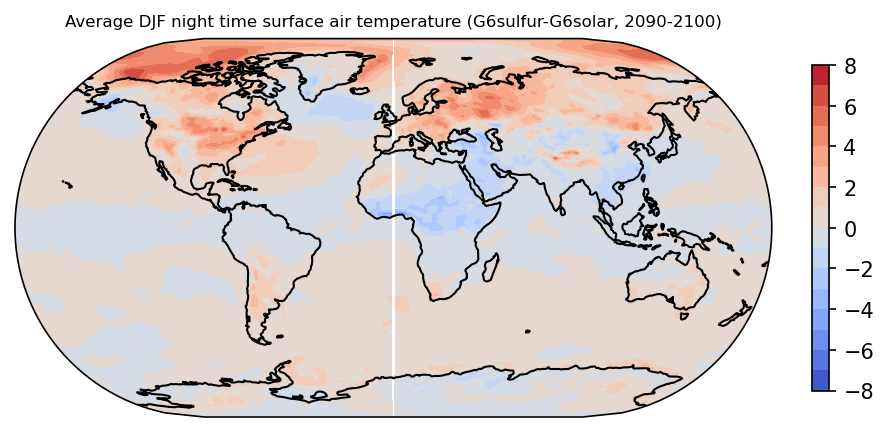

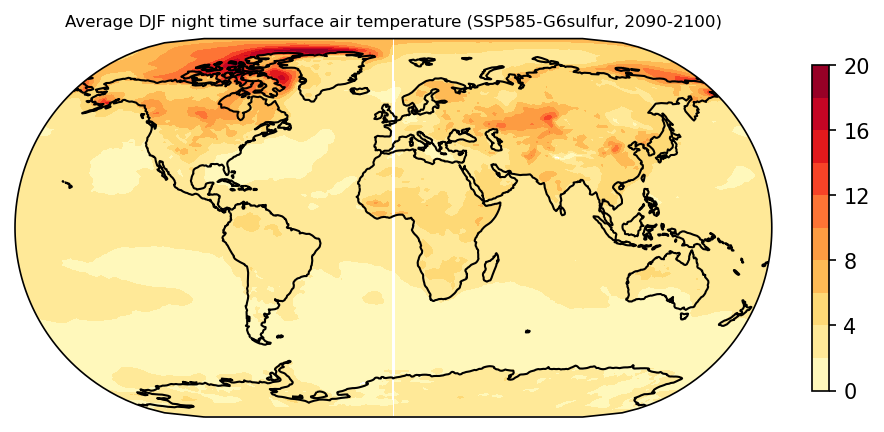

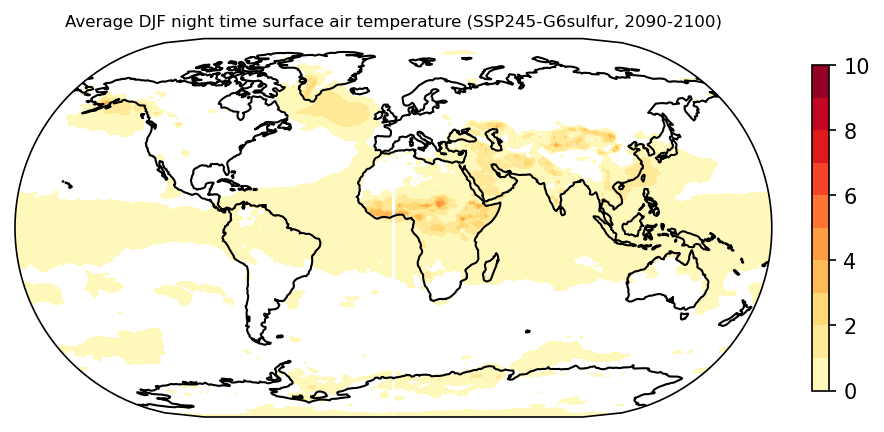

In [96]:
fig = plt.figure(figsize=(7,6),dpi=150)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.EckertIII())
filled_c = ax.contourf(ds_piC.lon, ds_piC.lat, (ds_sulfur-ds_solar).groupby('time.month').mean('time').sel(month=[1,2,12]).mean('month'),
                transform=ccrs.PlateCarree(), levels=np.linspace(-8,8,17),
                cmap='coolwarm')

fig.colorbar(filled_c, orientation='vertical',fraction=0.02)
ax.coastlines()
ax.set_global()
plt.title('Average DJF night time surface air temperature (G6sulfur-G6solar, 2090-2100)',fontsize=8)
plt.show()

fig = plt.figure(figsize=(7,6),dpi=150)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.EckertIII())
filled_c = ax.contourf(ds_piC.lon, ds_piC.lat, (ds_585-ds_sulfur).groupby('time.month').mean('time').sel(month=[1,2,12]).mean('month'),
                transform=ccrs.PlateCarree(), levels=np.linspace(0,20,11),
                cmap='YlOrRd')

fig.colorbar(filled_c, orientation='vertical',fraction=0.02)
ax.coastlines()
ax.set_global()
plt.title('Average DJF night time surface air temperature (SSP585-G6sulfur, 2090-2100)',fontsize=8)
plt.show()

fig = plt.figure(figsize=(7,6),dpi=150)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.EckertIII())
filled_c = ax.contourf(ds_piC.lon, ds_piC.lat, (ds_245-ds_sulfur).groupby('time.month').mean('time').sel(month=[1,2,12]).mean('month'),
                transform=ccrs.PlateCarree(), levels=np.linspace(0,10,11),
                cmap='YlOrRd')

fig.colorbar(filled_c, orientation='vertical',fraction=0.02)
ax.coastlines()
ax.set_global()
plt.title('Average DJF night time surface air temperature (SSP245-G6sulfur, 2090-2100)',fontsize=8)
plt.show()

In [87]:
ds_piC_m = xc.atmos.tx_max(xr.open_dataset('/badc/cmip6/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/piControl/r1i1p1f2/day/tasmax/gn/files/d20191008/tasmax_day_UKESM1-0-LL_piControl_r1i1p1f2_gn_20500101-21491230.nc').sel(time = slice("2090", "2100")).tasmax, freq='MS')
ds_585_m = xc.atmos.tx_max(xr.open_dataset('/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp585/r1i1p1f2/day/tasmax/gn/files/d20190726/tasmax_day_UKESM1-0-LL_ssp585_r1i1p1f2_gn_20500101-21001230.nc').sel(time = slice("2090", "2100")).tasmax, freq='MS')
ds_245_m = xc.atmos.tx_max(xr.open_dataset('/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp245/r10i1p1f2/day/tasmax/gn/files/d20210507/tasmax_day_UKESM1-0-LL_ssp245_r10i1p1f2_gn_20510101-21001230.nc').sel(time = slice("2090", "2100")).tasmax, freq='MS')
ds_solar_m = xc.atmos.tx_max(xr.open_dataset('/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G6solar/r1i1p1f2/day/tasmax/gn/files/d20191031/tasmax_day_UKESM1-0-LL_G6solar_r1i1p1f2_gn_20500101-21001230.nc').sel(time = slice("2090", "2100")).tasmax, freq='MS')
ds_sulfur_m = xc.atmos.tx_max(xr.open_dataset('/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G6sulfur/r1i1p1f2/day/tasmax/gn/files/d20191113/tasmax_day_UKESM1-0-LL_G6sulfur_r1i1p1f2_gn_20500101-21001230.nc').sel(time = slice("2090", "2100")).tasmax, freq='MS')

/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: mean time: maximum`, expected `['time: maximum*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: mean time: maximum`, expected `['time: maximum*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: mean time: maximum`, expected `['time: maximum*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: mean time: maximum`, expected `['time: maximum*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/

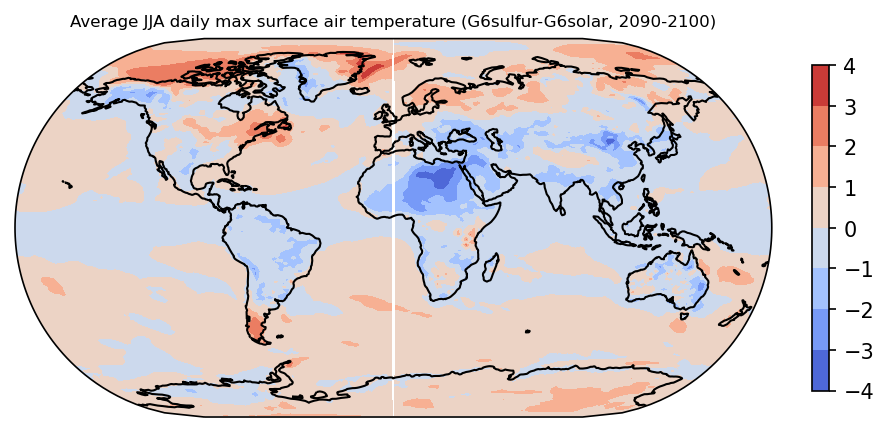

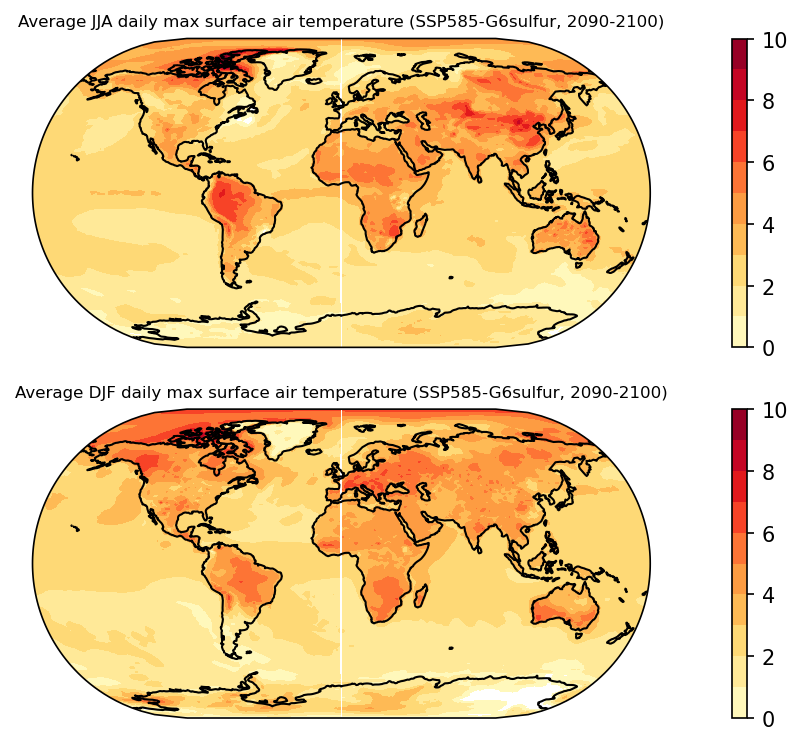

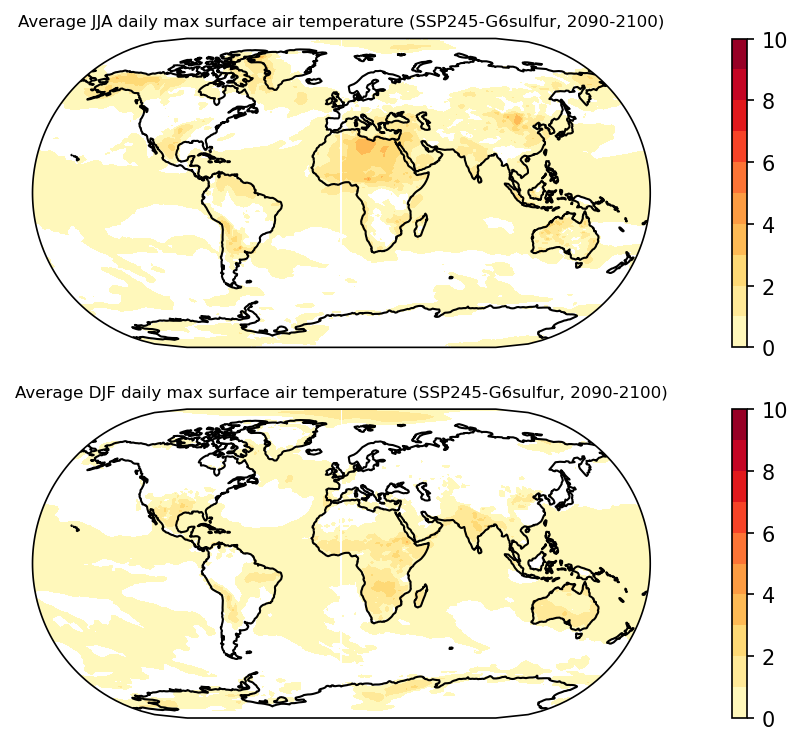

In [97]:
fig = plt.figure(figsize=(7,6),dpi=150)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.EckertIII())
filled_c = ax.contourf(ds_piC.lon, ds_piC.lat, (ds_sulfur_m-ds_solar_m).groupby('time.month').mean('time').sel(month=[1,2,12]).mean('month'),
                transform=ccrs.PlateCarree(), levels=np.linspace(-4,4,9),
                cmap='coolwarm')

fig.colorbar(filled_c, orientation='vertical',fraction=0.02)
ax.coastlines()
ax.set_global()
plt.title('Average JJA daily max surface air temperature (G6sulfur-G6solar, 2090-2100)',fontsize=8)
plt.show()

fig = plt.figure(figsize=(14,6),dpi=150)
ax = fig.add_subplot(2, 1, 1, projection=ccrs.EckertIII())
filled_c = ax.contourf(ds_piC.lon, ds_piC.lat, (ds_585_m-ds_sulfur_m).groupby('time.month').mean('time').sel(month=[1,2,12]).mean('month'),
                transform=ccrs.PlateCarree(), levels=np.linspace(0,10,11),
                cmap='YlOrRd')

fig.colorbar(filled_c, orientation='vertical',fraction=0.02)
ax.coastlines()
ax.set_global()
plt.title('Average JJA daily max surface air temperature (SSP585-G6sulfur, 2090-2100)',fontsize=8)
ax = fig.add_subplot(2, 1, 2, projection=ccrs.EckertIII())
filled_c = ax.contourf(ds_piC.lon, ds_piC.lat, (ds_585_m-ds_sulfur_m).groupby('time.month').mean('time').sel(month=[6,7,8]).mean('month'),
                transform=ccrs.PlateCarree(), levels=np.linspace(0,10,11),
                cmap='YlOrRd')

fig.colorbar(filled_c, orientation='vertical',fraction=0.02)
ax.coastlines()
ax.set_global()
plt.title('Average DJF daily max surface air temperature (SSP585-G6sulfur, 2090-2100)',fontsize=8)
plt.show()

fig = plt.figure(figsize=(14,6),dpi=150)
ax = fig.add_subplot(2, 1, 1, projection=ccrs.EckertIII())
filled_c = ax.contourf(ds_piC.lon, ds_piC.lat, (ds_245_m-ds_sulfur_m).groupby('time.month').mean('time').sel(month=[1,2,12]).mean('month'),
                transform=ccrs.PlateCarree(), levels=np.linspace(0,10,11),
                cmap='YlOrRd')

fig.colorbar(filled_c, orientation='vertical',fraction=0.02)
ax.coastlines()
ax.set_global()
plt.title('Average JJA daily max surface air temperature (SSP245-G6sulfur, 2090-2100)',fontsize=8)
ax = fig.add_subplot(2, 1, 2, projection=ccrs.EckertIII())
filled_c = ax.contourf(ds_piC.lon, ds_piC.lat, (ds_245_m-ds_sulfur_m).groupby('time.month').mean('time').sel(month=[6,7,8]).mean('month'),
                transform=ccrs.PlateCarree(), levels=np.linspace(0,10,11),
                cmap='YlOrRd')

fig.colorbar(filled_c, orientation='vertical',fraction=0.02)
ax.coastlines()
ax.set_global()
plt.title('Average DJF daily max surface air temperature (SSP245-G6sulfur, 2090-2100)',fontsize=8)
plt.show()

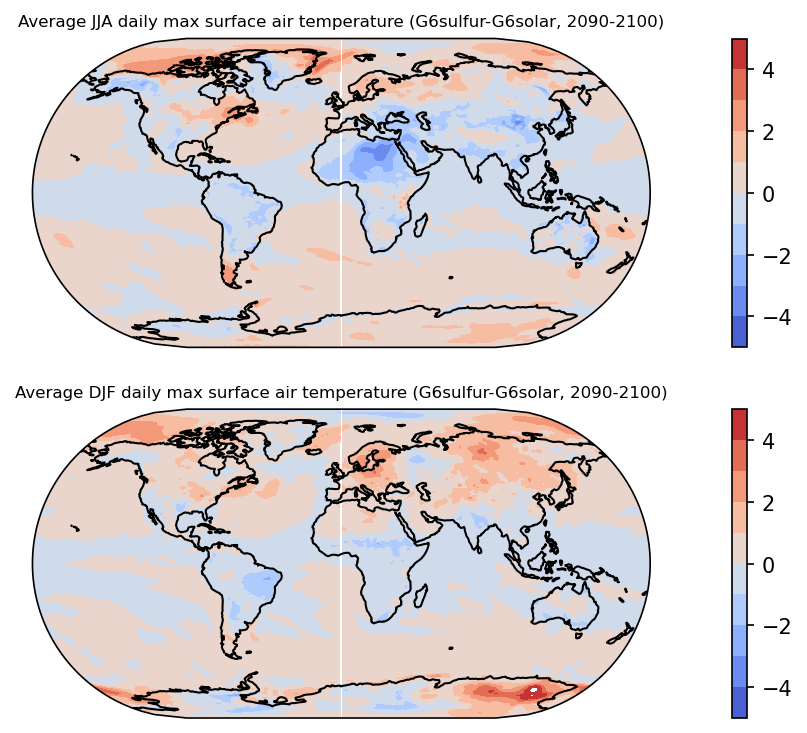

In [94]:
fig = plt.figure(figsize=(14,6),dpi=150)
ax = fig.add_subplot(2, 1, 1, projection=ccrs.EckertIII())
filled_c = ax.contourf(ds_piC.lon, ds_piC.lat, (ds_sulfur_m-ds_solar_m).groupby('time.month').mean('time').sel(month=[1,2,12]).mean('month'),
                transform=ccrs.PlateCarree(), levels=np.linspace(-5,5,11),
                cmap='coolwarm')

fig.colorbar(filled_c, orientation='vertical',fraction=0.02)
ax.coastlines()
ax.set_global()
plt.title('Average JJA daily max surface air temperature (G6sulfur-G6solar, 2090-2100)',fontsize=8)
ax = fig.add_subplot(2, 1, 2, projection=ccrs.EckertIII())
filled_c = ax.contourf(ds_piC.lon, ds_piC.lat, (ds_sulfur_m-ds_solar_m).groupby('time.month').mean('time').sel(month=[6,7,8]).mean('month'),
                transform=ccrs.PlateCarree(), levels=np.linspace(-5,5,11),
                cmap='coolwarm')

fig.colorbar(filled_c, orientation='vertical',fraction=0.02)
ax.coastlines()
ax.set_global()
plt.title('Average DJF daily max surface air temperature (G6sulfur-G6solar, 2090-2100)',fontsize=8)
plt.show()

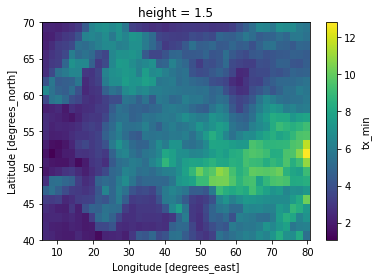

In [75]:
(ds_585-ds_sulfur).groupby('time.month').mean('time').sel(month=[1,2,12]).mean('month').sel(lat=slice(40,70),lon=slice(5,80)).plot()

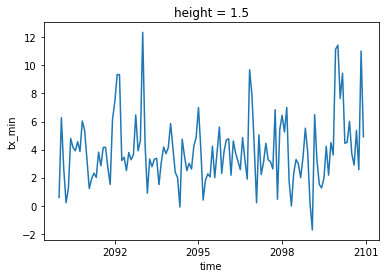

In [77]:
(ds_585-ds_sulfur).sel(lat=slice(40,70),lon=slice(5,80)).mean(('lat','lon')).plot()

In [78]:
ds_piC_ts = xc.atmos.tx_min(xr.open_dataset('/badc/cmip6/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/piControl/r1i1p1f2/day/tasmin/gn/files/d20191008/tasmin_day_UKESM1-0-LL_piControl_r1i1p1f2_gn_20500101-21491230.nc').sel(time = slice("2000", "2100")).tasmin, freq='MS')
ds_585_ts = xc.atmos.tx_min(xr.open_dataset('/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp585/r1i1p1f2/day/tasmin/gn/files/d20190726/tasmin_day_UKESM1-0-LL_ssp585_r1i1p1f2_gn_20500101-21001230.nc').sel(time = slice("2000", "2100")).tasmin, freq='MS')
ds_245_ts = xc.atmos.tx_min(xr.open_dataset('/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp245/r10i1p1f2/day/tasmin/gn/files/d20210507/tasmin_day_UKESM1-0-LL_ssp245_r10i1p1f2_gn_20510101-21001230.nc').sel(time = slice("2000", "2100")).tasmin, freq='MS')
ds_solar_ts = xc.atmos.tx_min(xr.open_dataset('/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G6solar/r1i1p1f2/day/tasmin/gn/files/d20191031/tasmin_day_UKESM1-0-LL_G6solar_r1i1p1f2_gn_20500101-21001230.nc').sel(time = slice("2000", "2100")).tasmin, freq='MS')
ds_sulfur_ts = xc.atmos.tx_min(xr.open_dataset('/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G6sulfur/r1i1p1f2/day/tasmin/gn/files/d20191113/tasmin_day_UKESM1-0-LL_G6sulfur_r1i1p1f2_gn_20500101-21001230.nc').sel(time = slice("2000", "2100")).tasmin, freq='MS')

/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: mean time: minimum`, expected `['time: maximum*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: mean time: minimum`, expected `['time: maximum*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: mean time: minimum`, expected `['time: maximum*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: mean time: minimum`, expected `['time: maximum*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/

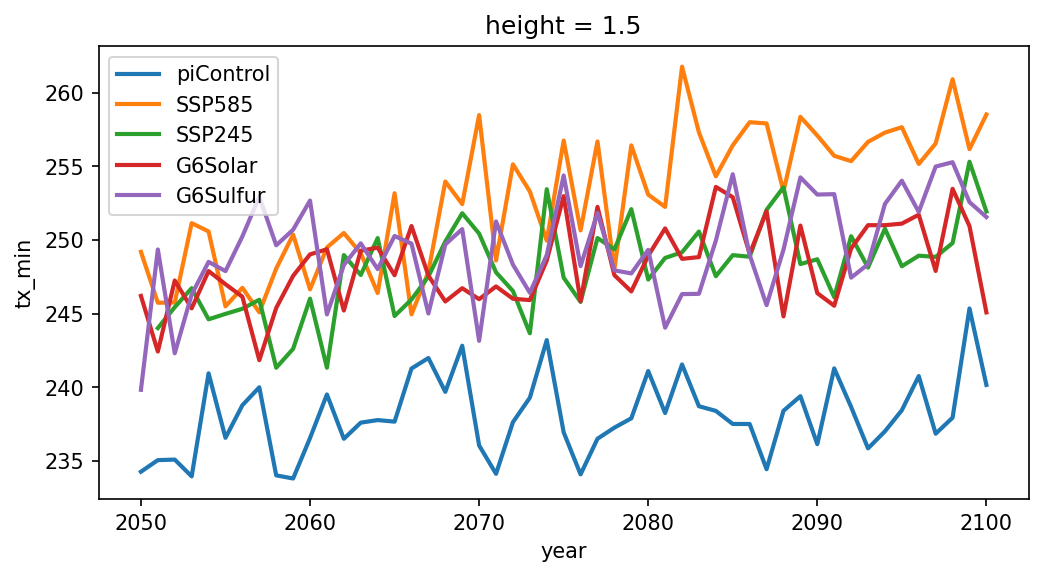

In [82]:
plt.figure(figsize=(8, 4),dpi=150)
ds_piC_ts.sel(lat=slice(50,70),lon=slice(5,80)).mean(('lat','lon')).groupby('time.year').min('time').plot(label='piControl',lw=2)
ds_585_ts.sel(lat=slice(50,70),lon=slice(5,80)).mean(('lat','lon')).groupby('time.year').min('time').plot(label='SSP585',lw=2)
ds_245_ts.sel(lat=slice(50,70),lon=slice(5,80)).mean(('lat','lon')).groupby('time.year').min('time').plot(label='SSP245',lw=2)
ds_solar_ts.sel(lat=slice(50,70),lon=slice(5,80)).mean(('lat','lon')).groupby('time.year').min('time').plot(label='G6Solar',lw=2)
ds_sulfur_ts.sel(lat=slice(50,70),lon=slice(5,80)).mean(('lat','lon')).groupby('time.year').min('time').plot(label='G6Sulfur',lw=2)
plt.legend()
plt.show()